# FASHION MNIST experiments notebook

### EXCEUTE ONLY FOR GOOGLE COLAB  !

In [1]:
# SETUP STUFF
# this mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# enter the foldername in your Drive where you have saved the xil program 
FOLDERNAME = "Masterthesis/XIL_experiments/xil_framework"
assert FOLDERNAME is not None, "[!] Enter the foldername."

# now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/MyDrive/{}'.format(FOLDERNAME))

Mounted at /content/drive


In [ ]:
pip install captum

In [ ]:
pip install lime

In [4]:
cd drive/MyDrive/Masterthesis/XIL_experiments/xil_framework/

/content/drive/MyDrive/Masterthesis/XIL_experiments/xil_framework


### Setup notebook

In [5]:
# IMPORTS
import torch
from torch import nn
from torch.nn import functional as F
import numpy as np

from learner.models import dnns
from learner.learner import Learner
from data_store.datasets import decoy_mnist, decoy_mnist_rieger, decoy_mnist_CE_augmented
from xil_methods.xil_loss import RRRLoss, CDEPLoss, HINTLoss, RBRLoss
import util
import explainer

In [6]:
# matplot magic
%matplotlib inline
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

# HYPERPARAMETERS for every experiment
SEED = 60
SHUFFLE = True
BATCH_SIZE = 256
LEARNING_RATE = 0.001
WEIGHT_DECAY = 0.0001
EPOCHS = 50
SAVE_BEST = True
VERBOSE_AFTER_N_EPOCHS = 2

Using cuda device


### Fashion MNIST (no decoy) 

Loading dataset from existing file!
Train set


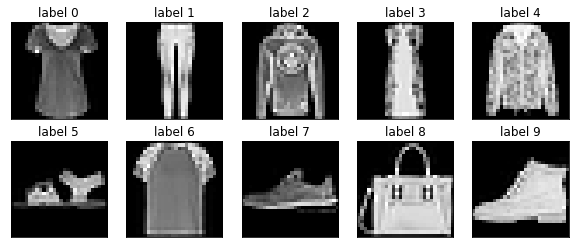

Val set


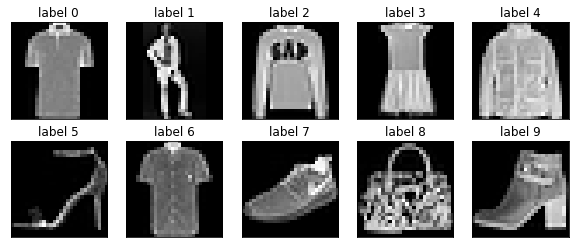

In [7]:
# Load dataloaders
train_dataloader, val_dataloader = decoy_mnist(no_decoy=True, fmnist=True, shuffle=SHUFFLE, device=device, batch_size=BATCH_SIZE)

# show image and explanation grid training
print("Train set")
util.show_img_grid_mnist(train_dataloader)
# show image and explanation grid val set
print("Val set")
util.show_img_grid_mnist(val_dataloader)

Fashion MNIST Simple CNN no XIL -> CrossEntropyLoss:
Start training...
Epoch 2| accuracy: 86.7%, loss: 0.001410 | Test Error: Acc: 86.3%, Avg loss: 0.006548
Epoch 4| accuracy: 89.6%, loss: 0.001097 | Test Error: Acc: 88.1%, Avg loss: 0.006471
Epoch 6| accuracy: 91.1%, loss: 0.000944 | Test Error: Acc: 88.6%, Avg loss: 0.006422
Epoch 8| accuracy: 92.1%, loss: 0.000824 | Test Error: Acc: 89.3%, Avg loss: 0.006340
Epoch 10| accuracy: 93.0%, loss: 0.000726 | Test Error: Acc: 89.7%, Avg loss: 0.006326
Epoch 12| accuracy: 93.9%, loss: 0.000628 | Test Error: Acc: 88.8%, Avg loss: 0.006337
Epoch 14| accuracy: 94.6%, loss: 0.000555 | Test Error: Acc: 89.3%, Avg loss: 0.006334
Epoch 16| accuracy: 95.3%, loss: 0.000489 | Test Error: Acc: 89.2%, Avg loss: 0.006302
Epoch 18| accuracy: 95.9%, loss: 0.000414 | Test Error: Acc: 88.9%, Avg loss: 0.006315
Epoch 20| accuracy: 96.2%, loss: 0.000390 | Test Error: Acc: 88.6%, Avg loss: 0.006328
Epoch 22| accuracy: 96.8%, loss: 0.000326 | Test Error: Acc: 89

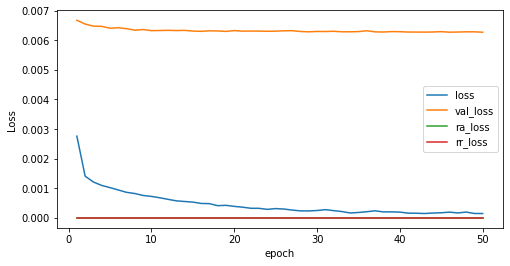

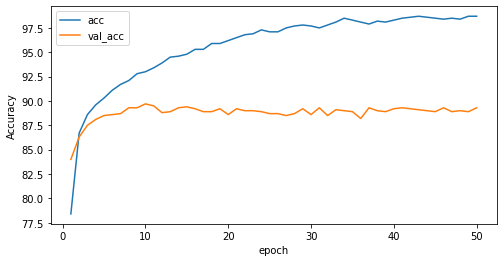

Done!


In [8]:
print("Fashion MNIST Simple CNN no XIL -> CrossEntropyLoss:")
util.set_seed(SEED)
# initalize model, loss and optimizer
model = dnns.SimpleConvNet().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)

# Build Learner
learner = Learner(model, loss_fn, optimizer, device, 'SimpleCNN-FMnist-CEL')
# training routine
learner.fit(train_dataloader, val_dataloader, EPOCHS, save_best=SAVE_BEST, verbose_after_n_epochs=VERBOSE_AFTER_N_EPOCHS)
# show train, val acc and loss
learner.plot_loss_acc()
#learner.validation_statistics(val_dataloader)

## if you want to load the best model according to val set
# learner.load('SimpleMlp-DecoyMnist-CEL.pt')
## evalute on val set
# learner.score(val_dataloader, F.cross_entropy)
print("Done!")

### Fashion DECOY MNIST: 
Load data, visualize it

Loading dataset from existing file!
Train set


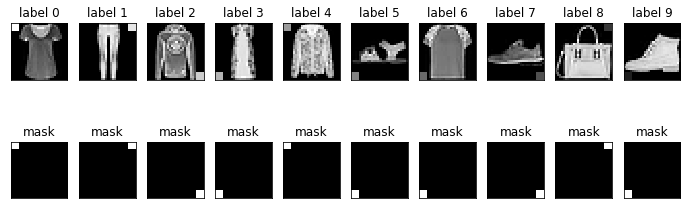

Val set


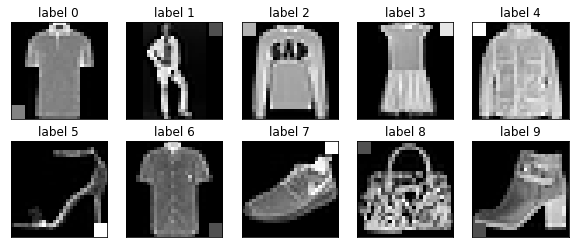

In [9]:
# Load dataloaders
train_dataloader, val_dataloader = decoy_mnist(fmnist=True, shuffle=SHUFFLE, device=device, batch_size=BATCH_SIZE)

# show image and explanation grid training
print("Train set")
util.show_img_expl_grid_mnist(train_dataloader)
# show image and explanation grid val set
print("Val set")
util.show_img_grid_mnist(val_dataloader)


### DECOY Fashion MNIST -> CNN, NO XIL LOSS

DECOY Fashion MNIST Simple MLP no XIL -> CrossEntropyLoss:
Start training...
Epoch 2| accuracy: 92.2%, loss: 0.000889 | Test Error: Acc: 65.5%, Avg loss: 0.007245
Epoch 4| accuracy: 95.7%, loss: 0.000495 | Test Error: Acc: 56.4%, Avg loss: 0.007582
Epoch 6| accuracy: 96.8%, loss: 0.000356 | Test Error: Acc: 56.0%, Avg loss: 0.007603
Epoch 8| accuracy: 97.6%, loss: 0.000258 | Test Error: Acc: 56.4%, Avg loss: 0.007575
Epoch 10| accuracy: 98.1%, loss: 0.000212 | Test Error: Acc: 55.5%, Avg loss: 0.007610
Epoch 12| accuracy: 98.2%, loss: 0.000194 | Test Error: Acc: 55.3%, Avg loss: 0.007609
Epoch 14| accuracy: 98.5%, loss: 0.000171 | Test Error: Acc: 58.6%, Avg loss: 0.007502
Epoch 16| accuracy: 98.4%, loss: 0.000177 | Test Error: Acc: 54.9%, Avg loss: 0.007634
Epoch 18| accuracy: 98.6%, loss: 0.000156 | Test Error: Acc: 54.4%, Avg loss: 0.007668
Epoch 20| accuracy: 98.7%, loss: 0.000142 | Test Error: Acc: 55.2%, Avg loss: 0.007612
Epoch 22| accuracy: 99.0%, loss: 0.000112 | Test Error: A

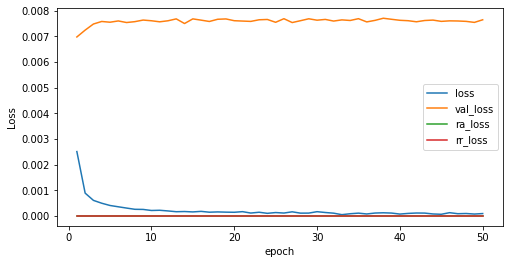

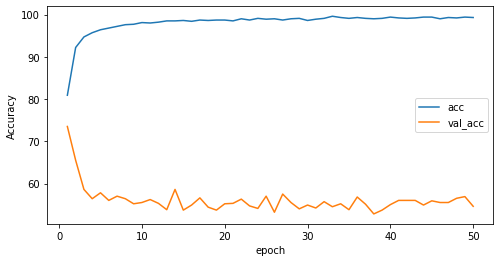

Done!


In [10]:
print("DECOY Fashion MNIST Simple MLP no XIL -> CrossEntropyLoss:")
util.set_seed(SEED)
# initalize model, loss and optimizer
model = dnns.SimpleConvNet().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)

# Build Learner
learner = Learner(model, loss_fn, optimizer, device, 'SimpleCNN-DecoyFMnist-CEL')
# training routine
learner.fit(train_dataloader, val_dataloader, EPOCHS, save_best=SAVE_BEST, verbose_after_n_epochs=VERBOSE_AFTER_N_EPOCHS)
# show train, val acc and loss
learner.plot_loss_acc()
#learner.validation_statistics(val_dataloader)

## if you want to load the best model according to val set
# learner.load('SimpleMlp-DecoyMnist-CEL.pt')
## evalute on val set
# learner.score(val_dataloader, F.cross_entropy)
print("Done!")

### DECOY Fashion MNIST -> CNN, XIL LOSS RRR

DECOY FMNIST Simple CNN XIL -> RRR Loss:
Start training...
Epoch 2| accuracy: 86.9%, loss: 0.001537 | Test Error: Acc: 85.7%, Avg loss: 0.006592
Epoch 4| accuracy: 90.0%, loss: 0.001184 | Test Error: Acc: 87.3%, Avg loss: 0.006505
Epoch 6| accuracy: 91.5%, loss: 0.001030 | Test Error: Acc: 88.0%, Avg loss: 0.006462
Epoch 8| accuracy: 92.3%, loss: 0.000920 | Test Error: Acc: 88.9%, Avg loss: 0.006399
Epoch 10| accuracy: 92.9%, loss: 0.000841 | Test Error: Acc: 88.9%, Avg loss: 0.006383
Epoch 12| accuracy: 93.7%, loss: 0.000758 | Test Error: Acc: 88.5%, Avg loss: 0.006386
Epoch 14| accuracy: 93.9%, loss: 0.000720 | Test Error: Acc: 89.1%, Avg loss: 0.006369
Epoch 16| accuracy: 94.7%, loss: 0.000642 | Test Error: Acc: 89.0%, Avg loss: 0.006344
Epoch 18| accuracy: 94.9%, loss: 0.000603 | Test Error: Acc: 89.2%, Avg loss: 0.006353
Epoch 20| accuracy: 95.2%, loss: 0.000562 | Test Error: Acc: 88.5%, Avg loss: 0.006361
Epoch 22| accuracy: 95.5%, loss: 0.000534 | Test Error: Acc: 89.5%, Avg los

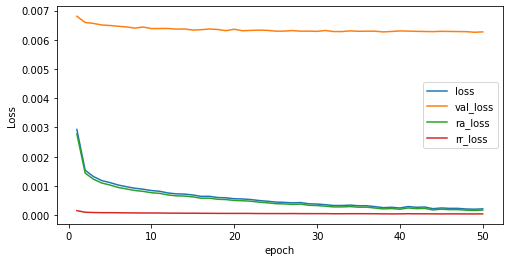

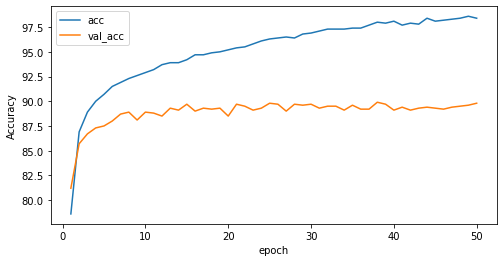

Done!


In [11]:
print("DECOY FMNIST Simple CNN XIL -> RRR Loss:")
util.set_seed(60)
# initalize model, loss and optimizer
model = dnns.SimpleConvNet().to(device)
loss_fn = RRRLoss(10) # param sets the regularizer
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)

# Build Learner
learner = Learner(model, loss_fn, optimizer, device, 'SimpleCNN-DecoyFMnist-RRR-reg10')
# training routine
learner.fit(train_dataloader, val_dataloader, EPOCHS, save_best=SAVE_BEST, verbose_after_n_epochs=VERBOSE_AFTER_N_EPOCHS)
# show train, val acc and loss
learner.plot_loss_acc()
#learner.validation_statistics(val_dataloader)

## if you want to load the best model according to val set
# learner.load('SimpleMlp-DecoyMnist-RRR.pt')
## evalute on val set
# learner.score(val_dataloader, F.cross_entropy)
print("Done!")

### DECOY Fashion MNIST -> CNN, XIL Loss RBR

DECOY FMNIST Simple CNN XIL -> RRR Loss:
Start training...
Epoch 2| accuracy: 89.5%, loss: 0.001231 | Test Error: Acc: 86.7%, Avg loss: 0.006541
Epoch 4| accuracy: 92.6%, loss: 0.000912 | Test Error: Acc: 86.7%, Avg loss: 0.006513
Epoch 6| accuracy: 93.8%, loss: 0.000766 | Test Error: Acc: 87.4%, Avg loss: 0.006455
Epoch 8| accuracy: 94.5%, loss: 0.000698 | Test Error: Acc: 86.7%, Avg loss: 0.006438
Epoch 10| accuracy: 95.0%, loss: 0.000640 | Test Error: Acc: 87.3%, Avg loss: 0.006425
Epoch 12| accuracy: 95.5%, loss: 0.000576 | Test Error: Acc: 86.1%, Avg loss: 0.006459
Epoch 14| accuracy: 95.7%, loss: 0.000561 | Test Error: Acc: 87.5%, Avg loss: 0.006422
Epoch 16| accuracy: 95.9%, loss: 0.000532 | Test Error: Acc: 88.1%, Avg loss: 0.006366
Epoch 18| accuracy: 96.3%, loss: 0.000491 | Test Error: Acc: 87.6%, Avg loss: 0.006399
Epoch 20| accuracy: 97.0%, loss: 0.000416 | Test Error: Acc: 86.6%, Avg loss: 0.006415
Epoch 22| accuracy: 96.3%, loss: 0.000483 | Test Error: Acc: 88.0%, Avg los

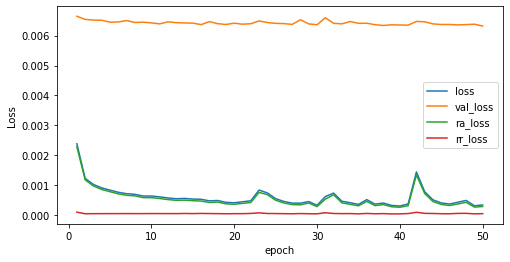

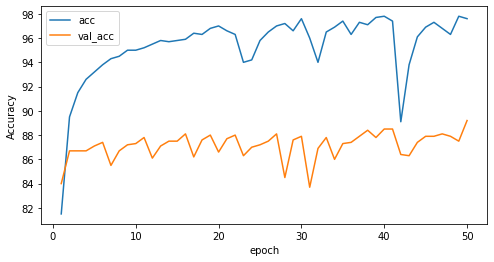

Done!


In [12]:
print("DECOY FMNIST Simple CNN XIL -> RRR Loss:")
util.set_seed(60)
# initalize model, loss and optimizer
model = dnns.SimpleConvNet().to(device)
loss_fn = RBRLoss(10000000) # param sets the regularizer
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)

# Build Learner
learner = Learner(model, loss_fn, optimizer, device, 'SimpleCNN-DecoyFMnist-RBR-reg10000000')
# training routine
learner.fit(train_dataloader, val_dataloader, EPOCHS, save_best=SAVE_BEST, verbose_after_n_epochs=VERBOSE_AFTER_N_EPOCHS)
# show train, val acc and loss
learner.plot_loss_acc()
#learner.validation_statistics(val_dataloader)

## if you want to load the best model according to val set
# learner.load('SimpleMlp-DecoyMnist-RRR.pt')
## evalute on val set
# learner.score(val_dataloader, F.cross_entropy)
print("Done!")

### DECOY Fashion MNIST ->  CNN, XIL LOSS CDEP

DECOY FMNIST Simple CNN XIL -> CDEP Loss:
Start training...
Epoch 2| accuracy: 83.2%, loss: 0.001838 | Test Error: Acc: 81.7%, Avg loss: 0.006743
Epoch 4| accuracy: 90.7%, loss: 0.001083 | Test Error: Acc: 74.8%, Avg loss: 0.006916
Epoch 6| accuracy: 93.4%, loss: 0.000772 | Test Error: Acc: 69.4%, Avg loss: 0.007123
Epoch 8| accuracy: 94.8%, loss: 0.000612 | Test Error: Acc: 64.0%, Avg loss: 0.007306
Epoch 10| accuracy: 95.9%, loss: 0.000478 | Test Error: Acc: 62.6%, Avg loss: 0.007348
Epoch 12| accuracy: 96.7%, loss: 0.000390 | Test Error: Acc: 60.3%, Avg loss: 0.007434
Epoch 14| accuracy: 96.8%, loss: 0.000360 | Test Error: Acc: 59.2%, Avg loss: 0.007478
Epoch 16| accuracy: 97.5%, loss: 0.000283 | Test Error: Acc: 58.4%, Avg loss: 0.007494
Epoch 18| accuracy: 97.8%, loss: 0.000253 | Test Error: Acc: 57.7%, Avg loss: 0.007537
Epoch 20| accuracy: 97.8%, loss: 0.000233 | Test Error: Acc: 57.1%, Avg loss: 0.007541
Epoch 22| accuracy: 98.1%, loss: 0.000212 | Test Error: Acc: 57.4%, Avg lo

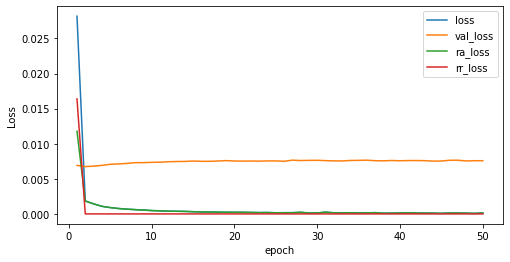

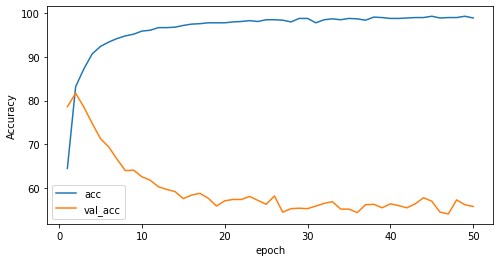

Done!


In [13]:
print("DECOY FMNIST Simple CNN XIL -> CDEP Loss:")
util.set_seed(SEED)
# initalize model, loss and optimizer
model = dnns.SimpleConvNet().to(device)
loss_fn = CDEPLoss(1000) # param sets the regularizer
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)

# Build Learner
learner = Learner(model, loss_fn, optimizer, device, 'SimpleCNN-DecoyFMnist-CDEP-reg1000')
# training routine
learner.fit(train_dataloader, val_dataloader, EPOCHS, save_best=SAVE_BEST, verbose_after_n_epochs=VERBOSE_AFTER_N_EPOCHS)
# show train, val acc and loss
learner.plot_loss_acc()
#learner.validation_statistics(val_dataloader)

## if you want to load the best model according to val set
# learner.load('SimpleMlp-DecoyMnist-RRR.pt')
## evalute on val set
# learner.score(val_dataloader, F.cross_entropy)
print("Done!")

### DECOY Fashion MNIST -> CNN, XIL LOSS HINT

Loading dataset from existing file!
Train set


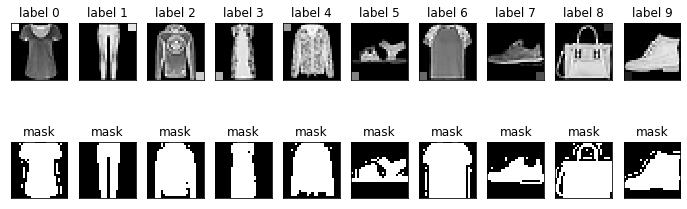

Val set


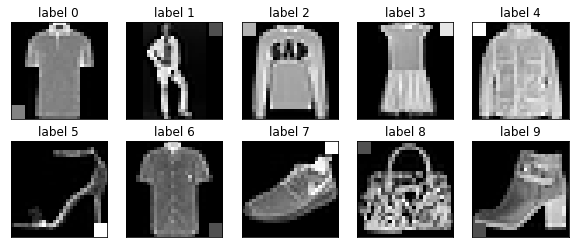

In [22]:
# Load dataloaders
train_dataloader, val_dataloader = decoy_mnist(fmnist=True, shuffle=SHUFFLE, device=device, batch_size=BATCH_SIZE, \
                                               hint_expl=True)

# show image and explanation grid training
print("Train set")
util.show_img_expl_grid_mnist(train_dataloader)
# show image and explanation grid val set
print("Val set")
util.show_img_grid_mnist(val_dataloader)

In [ ]:
print("DECOY FMNIST Simple CNN XIL -> HINT Loss:")
util.set_seed(SEED)
# initalize model, loss and optimizer
model = dnns.SimpleConvNet().to(device) # reg1000 --> nan after 26 epochs
loss_fn = HINTLoss(10, last_conv_specified=True, upsample=True) # param sets the regularizer
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)

# Build Learner
learner = Learner(model, loss_fn, optimizer, device, 'SimpleCNN-DecoyFMnist-HINT-reg100')
# training routine
learner.fit(train_dataloader, val_dataloader, EPOCHS, save_best=SAVE_BEST, verbose_after_n_epochs=VERBOSE_AFTER_N_EPOCHS)
# show train, val acc and loss
learner.plot_loss_acc()
#learner.validation_statistics(val_dataloader)

## if you want to load the best model according to val set
# learner.load('SimpleMlp-DecoyMnist-CDEP.pt')
## evalute on val set
# learner.score(val_dataloader, F.cross_entropy)
print("Done!")

# --> takes a lot of time in training (maybe implementation wrong? CPU/CUDA?)

DECOY FMNIST Simple CNN XIL -> HINT Loss:
Start training...
Epoch 2| accuracy: 78.0%, loss: 0.044497 | Test Error: Acc: 68.6%, Avg loss: 0.007192
Epoch 4| accuracy: 47.0%, loss: 0.094362 | Test Error: Acc: 21.3%, Avg loss: 0.008885
Epoch 6| accuracy: 9.9%, loss: 0.200078 | Test Error: Acc: 10.0%, Avg loss: 0.009210
Epoch 8| accuracy: 9.8%, loss: 0.200060 | Test Error: Acc: 10.0%, Avg loss: 0.009210
Epoch 10| accuracy: 10.1%, loss:      nan | Test Error: Acc: 10.0%, Avg loss:      nan
Epoch 12| accuracy: 10.0%, loss:      nan | Test Error: Acc: 10.0%, Avg loss:      nan
Epoch 14| accuracy: 10.0%, loss:      nan | Test Error: Acc: 10.0%, Avg loss:      nan
Epoch 16| accuracy: 10.0%, loss:      nan | Test Error: Acc: 10.0%, Avg loss:      nan
Epoch 18| accuracy: 10.0%, loss:      nan | Test Error: Acc: 10.0%, Avg loss:      nan
Epoch 20| accuracy: 10.0%, loss:      nan | Test Error: Acc: 10.0%, Avg loss:      nan


### DECOY Fashion MNIST -> CNN, XIL Loss HINT (downsampled)

DECOY MNIST Simple CNN XIL -> HINT Loss (downsampled)
Start training...
Epoch 2| accuracy: 90.8%, loss: 0.001847 | Test Error: Acc: 71.2%, Avg loss: 0.007070
Epoch 4| accuracy: 94.4%, loss: 0.001522 | Test Error: Acc: 63.9%, Avg loss: 0.007300
Epoch 6| accuracy: 95.9%, loss: 0.001405 | Test Error: Acc: 62.5%, Avg loss: 0.007359
Epoch 8| accuracy: 96.8%, loss: 0.001293 | Test Error: Acc: 59.5%, Avg loss: 0.007464
Epoch 10| accuracy: 96.9%, loss: 0.001278 | Test Error: Acc: 58.2%, Avg loss: 0.007505
Epoch 12| accuracy: 97.5%, loss: 0.001240 | Test Error: Acc: 58.9%, Avg loss: 0.007470
Epoch 14| accuracy: 97.5%, loss: 0.001249 | Test Error: Acc: 59.6%, Avg loss: 0.007457
Epoch 16| accuracy: 98.0%, loss: 0.001191 | Test Error: Acc: 56.7%, Avg loss: 0.007558
Epoch 18| accuracy: 97.8%, loss: 0.001180 | Test Error: Acc: 56.7%, Avg loss: 0.007569
Epoch 20| accuracy: 97.9%, loss: 0.001149 | Test Error: Acc: 57.0%, Avg loss: 0.007548
Epoch 22| accuracy: 97.8%, loss: 0.001109 | Test Error: Acc: 5

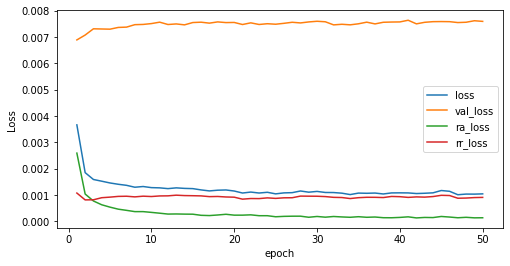

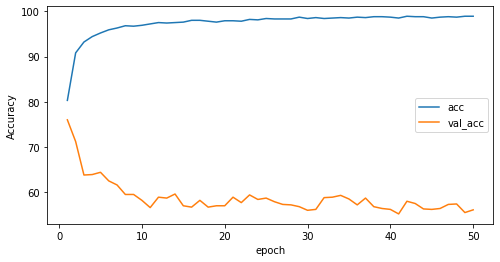

Done!


In [27]:
print("DECOY MNIST Simple CNN XIL -> HINT Loss (downsampled)")
util.set_seed(SEED)
# initalize model, loss and optimizer
model = dnns.SimpleConvNet().to(device)
loss_fn = HINTLoss(1, last_conv_specified=True) # param sets the regularizer
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)

# Build Learner
learner = Learner(model, loss_fn, optimizer, device, 'SimpleCNN-DecoyFMnist-HINT_d-reg100')
# training routine
learner.fit(train_dataloader, val_dataloader, EPOCHS, save_best=SAVE_BEST, verbose_after_n_epochs=VERBOSE_AFTER_N_EPOCHS)
# show train, val acc and loss
learner.plot_loss_acc()
#learner.validation_statistics(val_dataloader)

## if you want to load the best model according to val set
# learner.load('SimpleMlp-DecoyMnist-CDEP.pt')
## evalute on val set
# learner.score(val_dataloader, F.cross_entropy)
print("Done!")

### DECOY Fashion MNIST -> CNN, XIL Counterexamples (CE)

CE: strategy= random, n_counterexamples=1, n_instances=60000 (Whole dataset)

Loading dataset from existing file!
Train set was augmented: X.size= 120000, y.size= 120000
DECOY FMNIST Simple CNN XIL -> Counterexamples (CE)
Start training...
Epoch 2| accuracy: 98.9%, loss: 0.000136 | Test Error: Acc: 98.9%, Avg loss: 0.005905
Epoch 4| accuracy: 99.5%, loss: 0.000067 | Test Error: Acc: 98.6%, Avg loss: 0.005909
Epoch 6| accuracy: 99.6%, loss: 0.000051 | Test Error: Acc: 98.7%, Avg loss: 0.005904
Epoch 8| accuracy: 99.6%, loss: 0.000042 | Test Error: Acc: 98.8%, Avg loss: 0.005894
Epoch 10| accuracy: 99.7%, loss: 0.000038 | Test Error: Acc: 98.8%, Avg loss: 0.005893
Epoch 12| accuracy: 99.7%, loss: 0.000042 | Test Error: Acc: 98.9%, Avg loss: 0.005889
Epoch 14| accuracy: 99.7%, loss: 0.000037 | Test Error: Acc: 98.9%, Avg loss: 0.005890
Epoch 16| accuracy: 99.7%, loss: 0.000039 | Test Error: Acc: 98.9%, Avg loss: 0.005890
Epoch 18| accuracy: 99.8%, loss: 0.000025 | Test Error: Acc: 98.7%, Avg loss: 0.005895
Epoch 20| accuracy: 99.9%, loss: 0.000019 | Test Error: Acc

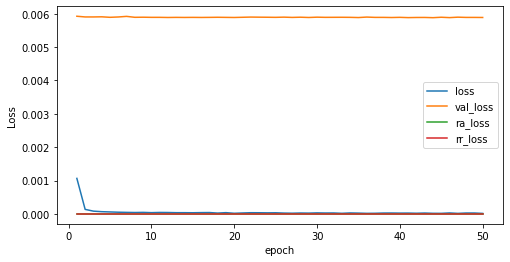

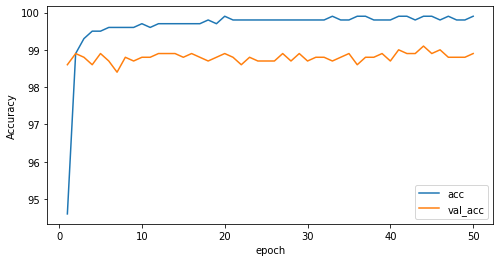

Done!


In [21]:
# Load augmented dataset
train_dataloader, val_dataloader = decoy_mnist_CE_augmented(shuffle=SHUFFLE, device=device, batch_size=BATCH_SIZE)

print("DECOY FMNIST Simple CNN XIL -> Counterexamples (CE)")
util.set_seed(SEED)
# initalize model, loss and optimizer
model = dnns.SimpleConvNet().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)

# Build Learner
learner = Learner(model, loss_fn, optimizer, device, 'SimpleCNN-DecoyFMnist-CE-60000augHINT')
# training routine
learner.fit(train_dataloader, val_dataloader, EPOCHS, save_best=SAVE_BEST, verbose_after_n_epochs=VERBOSE_AFTER_N_EPOCHS)
# show train, val acc and loss
learner.plot_loss_acc()
#learner.validation_statistics(val_dataloader)

## if you want to load the best model according to val set
# learner.load('SimpleMlp-DecoyMnist-CDEP.pt')
## evalute on val set
# learner.score(val_dataloader, F.cross_entropy)
print("Done!")